# Principal Component Analysis and Prediction using Logistic Regression

##### Importing the Required Packages

In [44]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

##### Importing the Dataset

In [45]:
data_original = pd.read_csv("T:\\PYTHON-programs\\machine-learning\\principal_component_analysis\\pca_and_prediction_using_logistic_regression\\survey_lung_cancer.csv")
data = data_original.copy()
print(data.info(), data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

##### Checking the Integrity and Truthfullness of the dataset

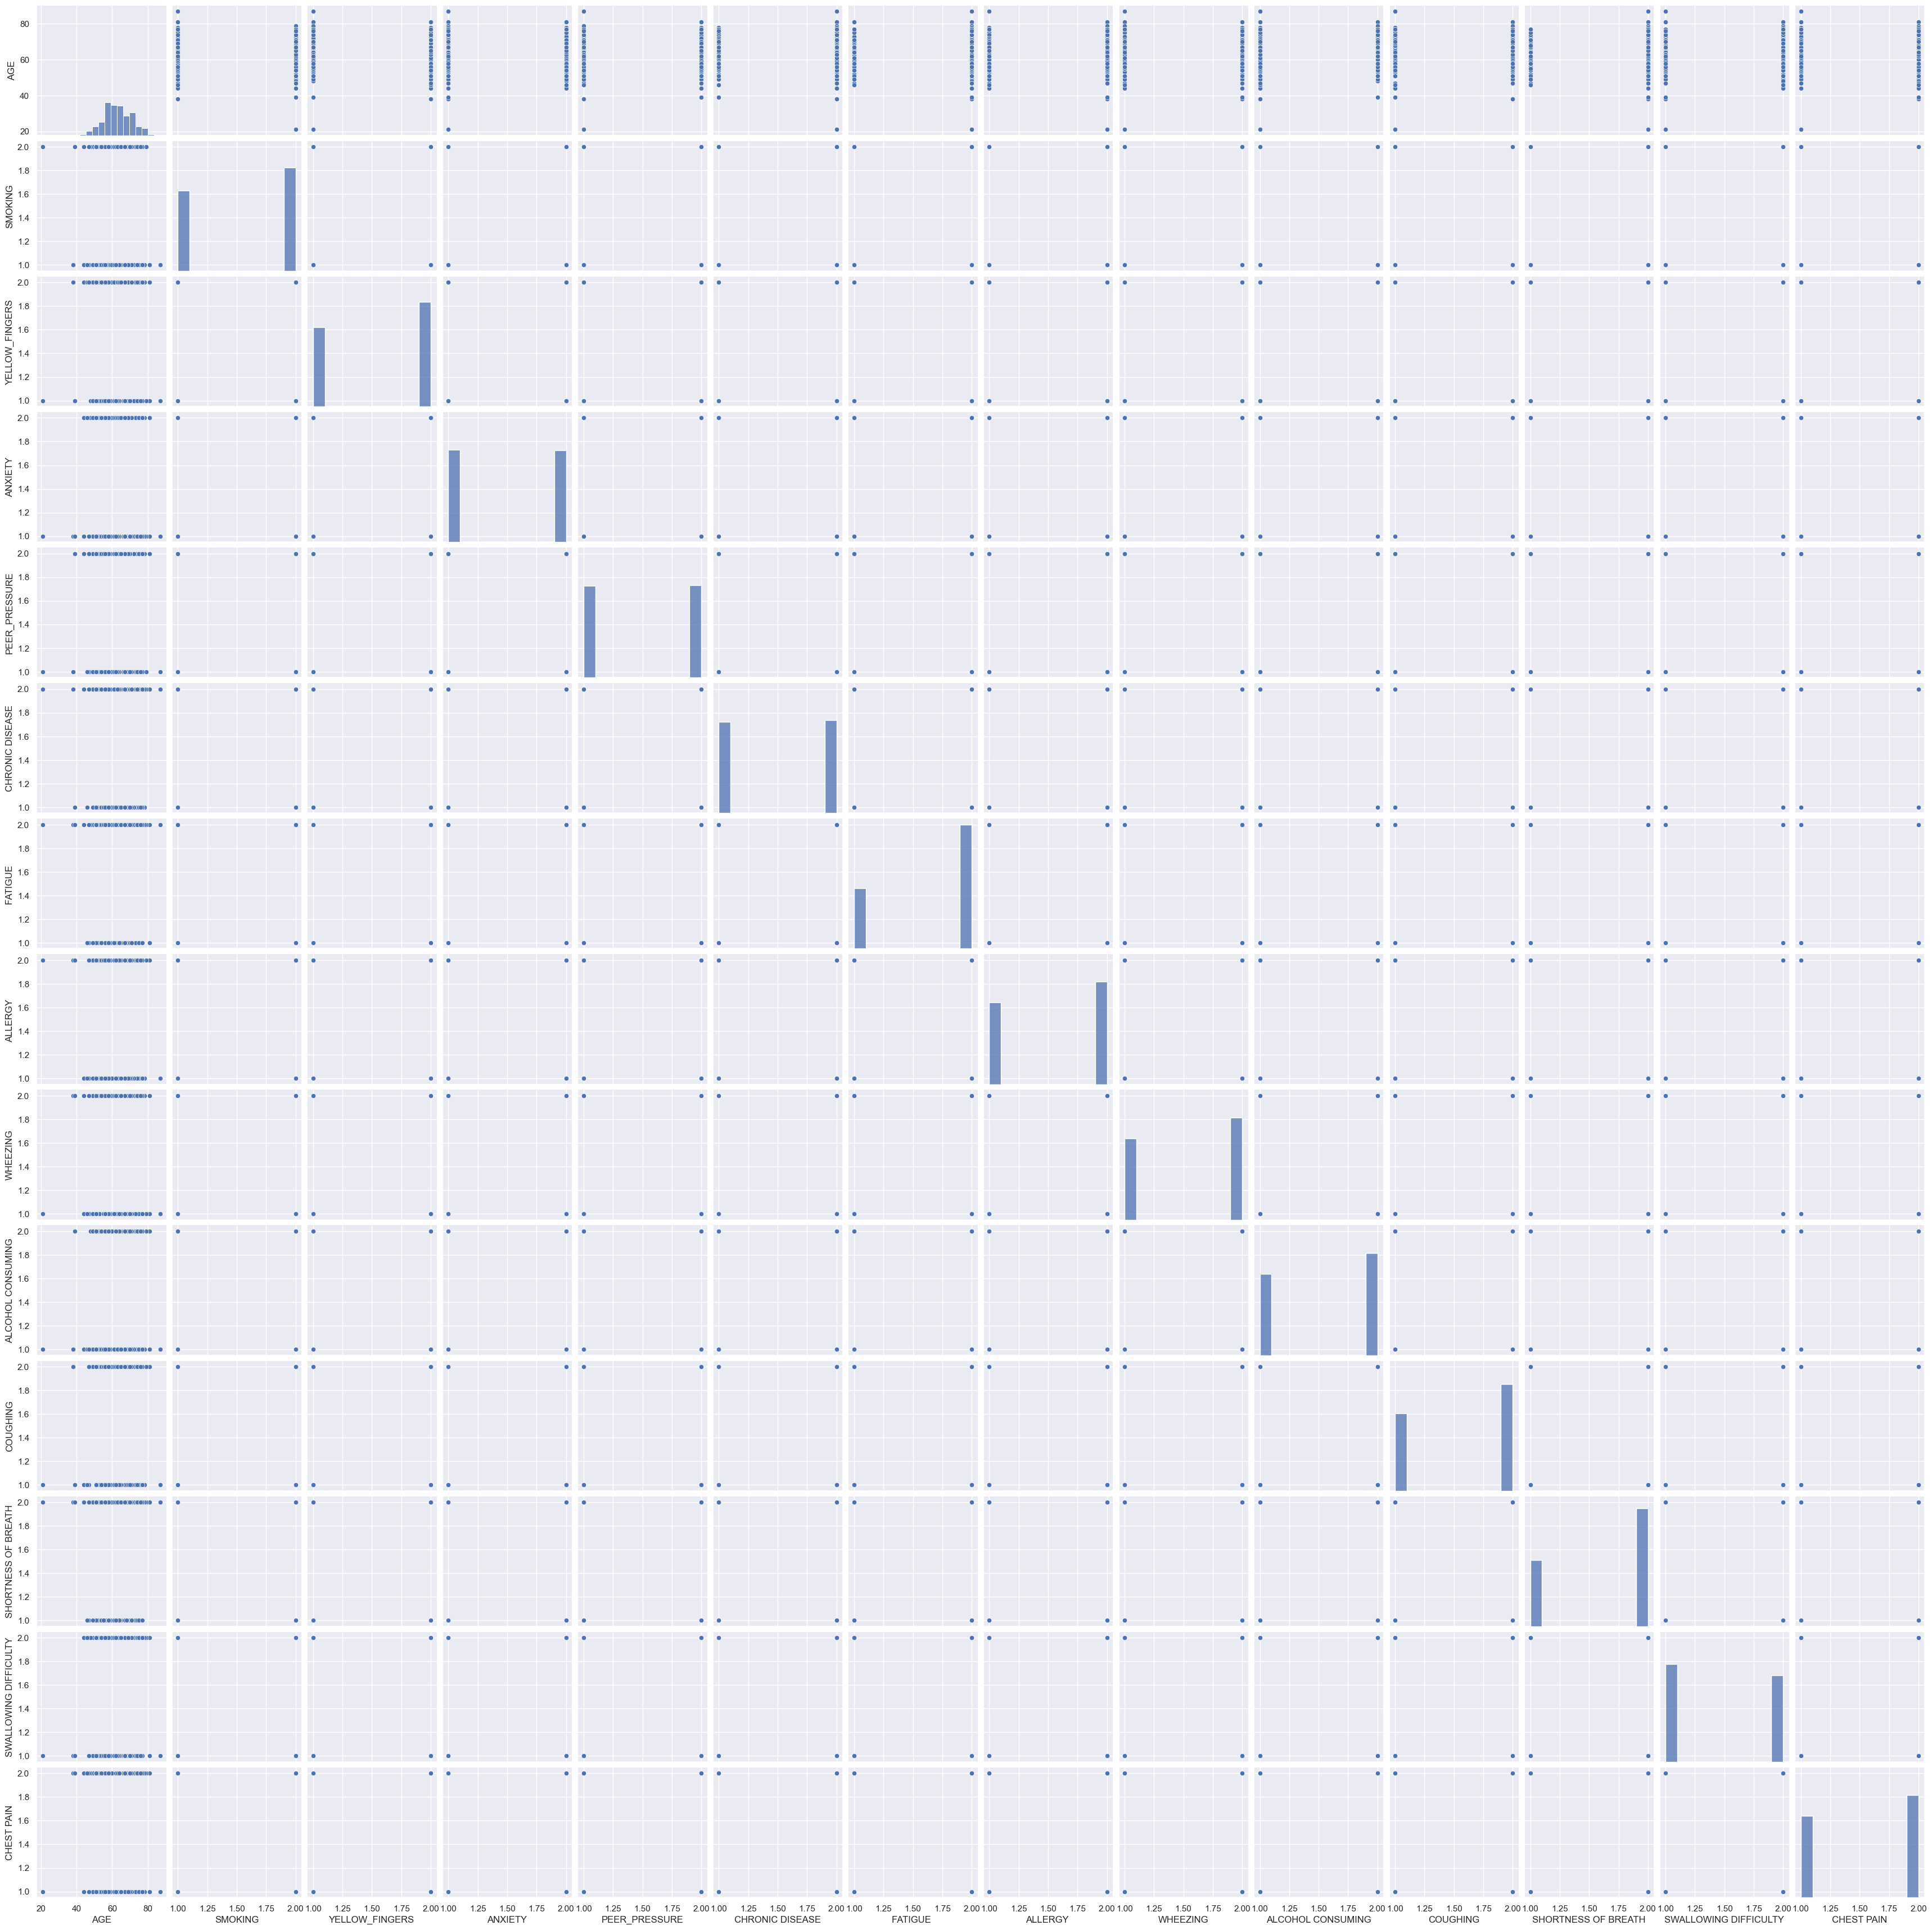

In [46]:
sns.pairplot(data)

In [47]:
result = data.columns
result

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [48]:
for i in range(2,15):
    data[result[i]] = data[result[i]].map({2:1,1:0})
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,YES
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,YES
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,NO
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,NO
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,NO


In [49]:
data["LUNG_CANCER"] = data["LUNG_CANCER"].map({"YES":1,"NO":0})
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,M,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,F,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,M,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,F,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [50]:
target = data["LUNG_CANCER"]
inputs = data.drop(["LUNG_CANCER","GENDER","AGE"], axis = 1)

## Logistic Regression 

In [51]:
model = sm.Logit(target, inputs).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.230090
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                  309
Model:                          Logit   Df Residuals:                      296
Method:                           MLE   Df Model:                           12
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:                  0.3931
Time:                        20:06:43   Log-Likelihood:                -71.098
converged:                       True   LL-Null:                       -117.15
Covariance Type:            nonrobust   LLR p-value:                 1.931e-14
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
SMOKING                  -0.2127      0.464     -0.459      0.647      -1.122       0.

<AxesSubplot: >

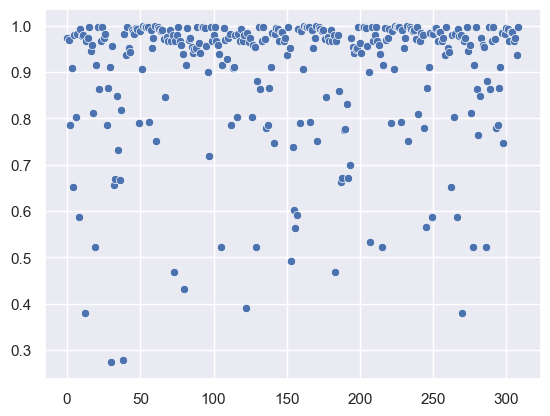

In [52]:
sns.scatterplot(model.predict())

##### Prediction using a static value

In [53]:
model.predict([1,0,1,0,1,0,1,1,1,1,1,0,0])

array([0.94449425])

##### Prediction Accuracy of the Model 

In [54]:
#accuracy 
accuracies = model.predict()
count = accuracies.shape
sum_temp = 0
for i in range(0,count[0]):
    sum_temp = sum_temp + accuracies[i]
avg_temp = sum_temp / count[0]
print(f"Model Accuracy: {avg_temp}")

Model Accuracy: 0.9015106573880446


### PCA - Principal Component Analysis 

In [55]:
pca = PCA(n_components = 5)
inputs_pca = pca.fit_transform(inputs)
inputs_pca

array([[ 0.05470433,  0.24872176, -0.97584056, -0.28309668,  0.44565077],
       [ 0.21697422, -0.31094107,  0.62578543, -0.37205969, -1.23436419],
       [ 0.67953964, -0.70256022, -0.63199807,  0.23353312,  0.32330652],
       ...,
       [ 1.13206216,  0.73874582,  0.53371984, -0.50390491,  0.72020887],
       [ 0.74904278, -0.08960249,  0.16169324, -1.03147246, -0.09139755],
       [ 0.18984022,  0.48369797,  0.01095128,  0.65558109,  0.41837239]])

##### Logistic Regression After PCA 

In [56]:
model_new = sm.Logit(target, inputs_pca).fit()
print(model_new.summary())

Optimization terminated successfully.
         Current function value: 0.611919
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:            LUNG_CANCER   No. Observations:                  309
Model:                          Logit   Df Residuals:                      304
Method:                           MLE   Df Model:                            4
Date:                Wed, 21 Dec 2022   Pseudo R-squ.:                 -0.6140
Time:                        20:06:44   Log-Likelihood:                -189.08
converged:                       True   LL-Null:                       -117.15
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0729      0.147      0.495      0.621      -0.216       0.362
x2             0.8911      0.

In [57]:
model_new.predict()

array([0.71083231, 0.52213772, 0.44479253, 0.36070588, 0.22349182,
       0.50102136, 0.4352989 , 0.52651614, 0.10292683, 0.67913544,
       0.68229785, 0.64376594, 0.10655308, 0.58481186, 0.43553421,
       0.78519422, 0.58326587, 0.53667886, 0.38911368, 0.13270451,
       0.45599121, 0.59246525, 0.23086105, 0.58481186, 0.84430901,
       0.71083231, 0.65303009, 0.44479253, 0.6415859 , 0.34767057,
       0.1076187 , 0.62883816, 0.22753145, 0.4337889 , 0.28233933,
       0.28861157, 0.42811686, 0.27122955, 0.28129949, 0.5152102 ,
       0.50504066, 0.5085444 , 0.4181244 , 0.58901247, 0.41493066,
       0.84418315, 0.61811207, 0.70214381, 0.81788293, 0.17454725,
       0.58266866, 0.48249044, 0.75448458, 0.84789377, 0.46466379,
       0.64217691, 0.39099915, 0.58964531, 0.67054563, 0.68069181,
       0.84677639, 0.13667769, 0.52430779, 0.46639116, 0.73270119,
       0.75486776, 0.65471126, 0.28987494, 0.67740945, 0.60925601,
       0.60578663, 0.60925601, 0.64376594, 0.1410886 , 0.58481

##### Prediction Accuracy of the model after PCA 

In [58]:
#accuracy 
accuracies_2 = model_new.predict()
count_2 = accuracies_2.shape
sum_temp_2 = 0
for i in range(0,count[0]):
    sum_temp_2 = sum_temp_2 + accuracies_2[i]
avg_temp_2 = sum_temp_2 / count_2[0]
print(f"Model Accuracy: {avg_temp_2}")

Model Accuracy: 0.5045987288852445


#### Prediction Accuracy of Logistic Regression without PCA: 0.9015 or 90.15%
#### Prediction Accuracy of Logistic Regression with PCA: 0.5045 or 50.45%